In [30]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# Load data

In [31]:
files = [files for files in os.listdir("Part B/Raw data") if files.endswith('.csv')]
files = sorted(files)
columns = pd.read_csv(f'Part B/Raw data/{files[0]}').columns.tolist()

# Read all CSV files and concatenate them into a single DataFrame

rawdata = pd.DataFrame()
for file in files:
  data = pd.read_csv(f"Part B/Raw data/{file}")
  data.columns = columns
  rawdata = pd.concat([rawdata, data], ignore_index=True)

df = rawdata.copy()

# Create a datetime index from year, month, and day columns
df.set_index(pd.to_datetime(df[['Year', 'Month', 'Day']]), inplace=True)
df.sort_index(inplace=True)
df.head()



,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-04-01,Changi,1980,4,1,0.0,—,—,—,—,—,—,—,—
1980-04-02,Changi,1980,4,2,71.2,—,—,—,—,—,—,—,—
1980-04-03,Changi,1980,4,3,3.6,—,—,—,—,—,—,—,—
1980-04-04,Changi,1980,4,4,0.4,—,—,—,—,—,—,—,—
1980-04-05,Changi,1980,4,5,0.0,—,—,—,—,—,—,—,—


In [32]:
for col in df.columns:
  if col not in ["Station", "Year", "Month", "Day"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the head and tail of the dataframe
display(df.head())

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-04-01,Changi,1980,4,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-02,Changi,1980,4,2,71.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-03,Changi,1980,4,3,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-04,Changi,1980,4,4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-05,Changi,1980,4,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean data

In [33]:
# check null 
print(df.isnull().sum())

Station                              0
Year                                 0
Month                                0
Day                                  0
Daily Rainfall Total (mm)            0
Highest 30 Min Rainfall (mm)     10444
Highest 60 Min Rainfall (mm)     10445
Highest 120 Min Rainfall (mm)    10445
Mean Temperature (°C)              547
Maximum Temperature (°C)           547
Minimum Temperature (°C)           547
Mean Wind Speed (km/h)             679
Max Wind Speed (km/h)              685
dtype: int64


In [34]:
cleanDf = df.drop(columns = ['Year', 'Month', 'Day']) 
cleanDf = cleanDf.drop(columns = ["Highest 30 Min Rainfall (mm)", "Highest 60 Min Rainfall (mm)", "Highest 120 Min Rainfall (mm)"]) # drop columns with high null values
cleanDf.head()

,Station,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1980-04-01,Changi,0.0,NaN,NaN,NaN,NaN,NaN
1980-04-02,Changi,71.2,NaN,NaN,NaN,NaN,NaN
1980-04-03,Changi,3.6,NaN,NaN,NaN,NaN,NaN
1980-04-04,Changi,0.4,NaN,NaN,NaN,NaN,NaN
1980-04-05,Changi,0.0,NaN,NaN,NaN,NaN,NaN


In [35]:
## remove the data before Mean Wind Speed (km/h) is collected
# assign the cleaned data to clean_df
first_non_null_wind_speed = cleanDf['Mean Wind Speed (km/h)'].first_valid_index()
print(f"First non-null value of Mean Wind Speed (km/h): {first_non_null_wind_speed}")
print(f"Value: {cleanDf['Mean Wind Speed (km/h)'][first_non_null_wind_speed]}")
cleanDf = cleanDf[first_non_null_wind_speed:]
display(cleanDf.head())

print("check null values in cleaned dataframe:")
print(cleanDf.isnull().sum())
display(cleanDf[cleanDf.isnull().any(axis=1)])


First non-null value of Mean Wind Speed (km/h): 1983-01-01 00:00:00
Value: 5.5


,Station,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1983-01-01,Changi,0.3,26.5,28.7,25.1,5.5,29.9
1983-01-02,Changi,0.4,26.8,30.6,24.8,9.4,43.2
1983-01-03,Changi,2.9,27.0,31.3,24.5,10.7,42.8
1983-01-04,Changi,0.0,27.3,30.8,25.0,12.6,42.1
1983-01-05,Changi,0.0,27.1,31.8,23.7,10.3,34.6


check null values in cleaned dataframe:
Station                       0
Daily Rainfall Total (mm)     0
Mean Temperature (°C)         0
Maximum Temperature (°C)      0
Minimum Temperature (°C)      0
Mean Wind Speed (km/h)       10
Max Wind Speed (km/h)        16
dtype: int64


,Station,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
2010-07-30,Changi,24.4,25.6,28.5,22.8,NaN,NaN
2010-07-31,Changi,36.3,27.9,31.2,24.4,NaN,NaN
2010-08-02,Changi,0.0,28.2,31.8,25.6,NaN,NaN
2010-08-03,Changi,0.0,28.3,31.7,24.6,NaN,NaN
2015-02-10,Changi,0.0,26.7,30.4,24.5,NaN,NaN
2015-02-11,Changi,0.0,26.6,31.1,23.6,NaN,NaN
2015-02-12,Changi,0.0,26.3,30.8,23.3,NaN,NaN
2015-02-13,Changi,0.0,26.6,30.8,24.0,10.4,NaN
2016-09-21,Changi,2.5,28.1,33.6,24.0,NaN,NaN
2020-04-01,Changi,0.0,29.3,32.7,26.4,9.9,NaN


In [36]:
# as the null values are not too many and scattered, we use forward fill to fill the null values
cleanDf = cleanDf.ffill()
cleanDf.isnull().sum()

Station                      0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Maximum Temperature (°C)     0
Minimum Temperature (°C)     0
Mean Wind Speed (km/h)       0
Max Wind Speed (km/h)        0
dtype: int64

In [37]:
cleanDf.resample('D').max().isnull().sum()

Station                      2347
Daily Rainfall Total (mm)    2347
Mean Temperature (°C)        2347
Maximum Temperature (°C)     2347
Minimum Temperature (°C)     2347
Mean Wind Speed (km/h)       2347
Max Wind Speed (km/h)        2347
dtype: int64

There is about 2347 days without data collected. 

In [38]:
cleanDf = cleanDf.resample('D').max()
print("Null values after resampling to daily frequency:")
print(cleanDf.isnull().sum())
cleanDf.ffill(inplace=True)
print("Null values after forward fill:")
print(cleanDf.isnull().sum())

Null values after resampling to daily frequency:
Station                      2347
Daily Rainfall Total (mm)    2347
Mean Temperature (°C)        2347
Maximum Temperature (°C)     2347
Minimum Temperature (°C)     2347
Mean Wind Speed (km/h)       2347
Max Wind Speed (km/h)        2347
dtype: int64
Null values after forward fill:
Station                      0
Daily Rainfall Total (mm)    0
Mean Temperature (°C)        0
Maximum Temperature (°C)     0
Minimum Temperature (°C)     0
Mean Wind Speed (km/h)       0
Max Wind Speed (km/h)        0
dtype: int64


In [39]:
cleanDf.head()

,Station,Daily Rainfall Total (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1983-01-01,Changi,0.3,26.5,28.7,25.1,5.5,29.9
1983-01-02,Changi,0.4,26.8,30.6,24.8,9.4,43.2
1983-01-03,Changi,2.9,27.0,31.3,24.5,10.7,42.8
1983-01-04,Changi,0.0,27.3,30.8,25.0,12.6,42.1
1983-01-05,Changi,0.0,27.1,31.8,23.7,10.3,34.6


# EDA

In [40]:
# Some plots of the raw data.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare data for plotting
plot_data = cleanDf[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)', "Max Wind Speed (km/h)"]].reset_index()

# Create individual plots
fig1 = px.line(plot_data, x='index', y='Daily Rainfall Total (mm)', 
               title='Daily Rainfall Total (mm)')
fig2 = px.line(plot_data, x='index', y='Mean Temperature (°C)', 
               title='Mean Temperature (°C)')
fig3 = px.line(plot_data, x='index', y='Mean Wind Speed (km/h)', 
               title='Mean Wind Speed (km/h)')
fig4 = px.line(plot_data, x='index', y='Max Wind Speed (km/h)', 
               title='Max Wind Speed (km/h)')

# Show plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()


## Resample to weekly and monthly

In [41]:
meanDfWeekly = cleanDf[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']].resample('W').mean()
meanDfMonthly = cleanDf[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']].resample('ME').mean()
print("Weekly:")
display(meanDfWeekly.head())
print("Monthly:")
display(meanDfMonthly.head())


Weekly:


,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
1983-01-02,0.350000,26.650000,7.450000
1983-01-09,3.600000,27.000000,10.628571
1983-01-16,14.385714,26.228571,10.500000
1983-01-23,12.542857,26.314286,12.142857
1983-01-30,4.514286,26.071429,12.800000


Monthly:


,Daily Rainfall Total (mm),Mean Temperature (°C),Mean Wind Speed (km/h)
1983-01-31,7.935484,26.451613,11.235484
1983-02-28,0.200000,28.060714,13.696429
1983-03-31,0.600000,28.890323,11.800000
1983-04-30,1.120000,29.376667,9.213333
1983-05-31,1.083871,28.264516,4.887097


In [42]:
maxDfWeekly = cleanDf[["Maximum Temperature (°C)", "Max Wind Speed (km/h)"]].resample('W').max()
maxDfMonthly = cleanDf[["Maximum Temperature (°C)", "Max Wind Speed (km/h)"]].resample('ME').max()
print("Weekly Max")
display(maxDfWeekly.head())
print("Monthly Max")
display(maxDfMonthly.head())


Weekly Max


,Maximum Temperature (°C),Max Wind Speed (km/h)
1983-01-02,30.6,43.2
1983-01-09,32.1,42.8
1983-01-16,31.3,54.0
1983-01-23,31.2,59.8
1983-01-30,31.6,58.0


Monthly Max


,Maximum Temperature (°C),Max Wind Speed (km/h)
1983-01-31,32.1,59.8
1983-02-28,34.6,48.6
1983-03-31,35.8,52.2
1983-04-30,35.8,58.0
1983-05-31,34.0,55.8


In [43]:
# Prepare data for plotting
plot_data_monthly = meanDfMonthly[['Daily Rainfall Total (mm)', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)']].reset_index()
plot_data_max_monthly = maxDfMonthly[['Max Wind Speed (km/h)']].reset_index()

# Create individual plots
fig1 = px.line(plot_data_monthly, x='index', y='Daily Rainfall Total (mm)', 
               title='Mean Daily Rainfall Total (mm) in a monthly interval')
fig2 = px.line(plot_data_monthly, x='index', y='Mean Temperature (°C)', 
               title='Mean Temperature (°C) in monthly interval')
fig3 = px.line(plot_data_monthly, x='index', y='Mean Wind Speed (km/h)', 
               title='Mean Wind Speed (km/h) in monthly interval')
fig4 = px.line(plot_data_max_monthly, x='index', y='Max Wind Speed (km/h)',
                title='Max Wind Speed (km/h) in monthly interval')

# Show plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()


# Time series modeling

In [44]:
# ADF Test for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name="Data"):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"  Test Statistic: {result[0]:.4f}")
    print(f"  P-value: {result[1]:.4f}")
    print(f"  Critical Values: {result[4]}")
    print("  Stationary" if result[1] < 0.05 else "  Not Stationary")
    print()



In [45]:
# set X the daily rainfall total
X = cleanDf['Daily Rainfall Total (mm)']

# Check stationarity of original data
adf_test(X, "Original Data Daily Rainfall Total (mm)")

# Apply differencing if needed
df_diff = X.diff().dropna()
adf_test(df_diff, "1st Differenced Data")  # Checking for d

# Seasonal differencing (D)
df_seasonal_diff = X.diff(28).dropna()
adf_test(df_seasonal_diff, "Seasonal Differenced Data (28)")  # Checking for D

# Seasonal + First Differencing
df_combined_diff = X.diff().diff(28).dropna()
adf_test(df_combined_diff, "1st + Seasonal Differenced Data (28)")

ADF Test for Original Data Daily Rainfall Total (mm):
  Test Statistic: -11.9924
  P-value: 0.0000
  Critical Values: {'1%': -3.430776334302167, '5%': -2.8617284216258767, '10%': -2.5668702922302393}
  Stationary

ADF Test for 1st Differenced Data:
  Test Statistic: -27.0244
  P-value: 0.0000
  Critical Values: {'1%': -3.430776723790019, '5%': -2.86172859375057, '10%': -2.5668703838501568}
  Stationary

ADF Test for Seasonal Differenced Data (28):
  Test Statistic: -18.2249
  P-value: 0.0000
  Critical Values: {'1%': -3.430777476958399, '5%': -2.861728926594972, '10%': -2.566870561019266}
  Stationary

ADF Test for 1st + Seasonal Differenced Data (28):
  Test Statistic: -34.5628
  P-value: 0.0000
  Critical Values: {'1%': -3.430777504904586, '5%': -2.8617289389451064, '10%': -2.566870567593096}
  Stationary



In [46]:
# set X the daily rainfall total
X = cleanDf['Mean Temperature (°C)']

# Check stationarity of original data
adf_test(X, "Original Data Mean Temperature (°C)")

# Apply differencing if needed
df_diff = X.diff().dropna()
adf_test(df_diff, "1st Differenced Data")  # Checking for d

# Seasonal differencing (D)
df_seasonal_diff = X.diff(28).dropna()
adf_test(df_seasonal_diff, "Seasonal Differenced Data (28)")  # Checking for D

# Seasonal + First Differencing
df_combined_diff = X.diff().diff(28).dropna()
adf_test(df_combined_diff, "1st + Seasonal Differenced Data (28)")

ADF Test for Original Data Mean Temperature (°C):
  Test Statistic: -8.7582
  P-value: 0.0000
  Critical Values: {'1%': -3.430776473323325, '5%': -2.861728483062902, '10%': -2.566870324932433}
  Stationary

ADF Test for 1st Differenced Data:
  Test Statistic: -30.0248
  P-value: 0.0000
  Critical Values: {'1%': -3.430776473323325, '5%': -2.861728483062902, '10%': -2.566870324932433}
  Stationary

ADF Test for Seasonal Differenced Data (28):
  Test Statistic: -15.9442
  P-value: 0.0000
  Critical Values: {'1%': -3.430777476958399, '5%': -2.861728926594972, '10%': -2.566870561019266}
  Stationary

ADF Test for 1st + Seasonal Differenced Data (28):
  Test Statistic: -33.1497
  P-value: 0.0000
  Critical Values: {'1%': -3.430777504904586, '5%': -2.8617289389451064, '10%': -2.566870567593096}
  Stationary



In [47]:
# set X the daily rainfall total
X = cleanDf['Mean Wind Speed (km/h)']

# Check stationarity of original data
adf_test(X, "Original Data Mean Wind Speed (km/h)")

# Apply differencing if needed
df_diff = X.diff().dropna()
adf_test(df_diff, "1st Differenced Data")  # Checking for d

# Seasonal differencing (D)
df_seasonal_diff = X.diff(28).dropna()
adf_test(df_seasonal_diff, "Seasonal Differenced Data (28)")  # Checking for D

# Seasonal + First Differencing
df_combined_diff = X.diff().diff(28).dropna()
adf_test(df_combined_diff, "1st + Seasonal Differenced Data (28)")

ADF Test for Original Data Mean Wind Speed (km/h):
  Test Statistic: -11.8909
  P-value: 0.0000
  Critical Values: {'1%': -3.430776084292352, '5%': -2.861728311140101, '10%': -2.566870233419983}
  Stationary

ADF Test for 1st Differenced Data:
  Test Statistic: -29.7082
  P-value: 0.0000
  Critical Values: {'1%': -3.4307763620991474, '5%': -2.8617284339100775, '10%': -2.5668702987689724}
  Stationary

ADF Test for Seasonal Differenced Data (28):
  Test Statistic: -17.2543
  P-value: 0.0000
  Critical Values: {'1%': -3.430777281437347, '5%': -2.8617288401892185, '10%': -2.5668705150265114}
  Stationary

ADF Test for 1st + Seasonal Differenced Data (28):
  Test Statistic: -29.9893
  P-value: 0.0000
  Critical Values: {'1%': -3.430777504904586, '5%': -2.8617289389451064, '10%': -2.566870567593096}
  Stationary



In [48]:
# set X the daily rainfall total
X = cleanDf['Max Wind Speed (km/h)']

# Check stationarity of original data
adf_test(X, "Original Data Max Wind Speed (km/h)")

# Apply differencing if needed
df_diff = X.diff().dropna()
adf_test(df_diff, "1st Differenced Data")  # Checking for d

# Seasonal differencing (D)
df_seasonal_diff = X.diff(28).dropna()
adf_test(df_seasonal_diff, "Seasonal Differenced Data (28)")  # Checking for D

# Seasonal + First Differencing
df_combined_diff = X.diff().diff(28).dropna()
adf_test(df_combined_diff, "1st + Seasonal Differenced Data (28)")

ADF Test for Original Data Max Wind Speed (km/h):
  Test Statistic: -9.1528
  P-value: 0.0000
  Critical Values: {'1%': -3.4307763065088115, '5%': -2.8617284093432773, '10%': -2.5668702856923584}
  Stationary

ADF Test for 1st Differenced Data:
  Test Statistic: -31.6438
  P-value: 0.0000
  Critical Values: {'1%': -3.4307764455118406, '5%': -2.861728470772292, '10%': -2.5668703183902886}
  Stationary

ADF Test for Seasonal Differenced Data (28):
  Test Statistic: -17.7819
  P-value: 0.0000
  Critical Values: {'1%': -3.430777393141756, '5%': -2.8617288895542545, '10%': -2.566870541302933}
  Stationary

ADF Test for 1st + Seasonal Differenced Data (28):
  Test Statistic: -32.8985
  P-value: 0.0000
  Critical Values: {'1%': -3.430777504904586, '5%': -2.8617289389451064, '10%': -2.566870567593096}
  Stationary



The Daily Rainfall Total (mm), Mean Temperature (°C), Mean Wind Speed (km/h), Max Wind Speed (km/h) are stationary

## Prophet

In [49]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Remove verbose logging
import logging
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").disabled=True

# Prepare the data for Prophet
# Prophet requires the dataframe to have columns 'ds' (datestamp) and 'y' (value)
# Using monthly mean temperature data
prophet_df = meanDfMonthly[['Mean Temperature (°C)']].reset_index()
prophet_df = prophet_df.rename(columns={'index': 'ds', 'Mean Temperature (°C)': 'y'})

# Drop rows with NaN values in 'y'
prophet_df = prophet_df.dropna(subset=['y'])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a dataframe for future dates (12 months)
future = model.make_future_dataframe(periods=12, freq='ME')

# Make predictions
forecast = model.predict(future)



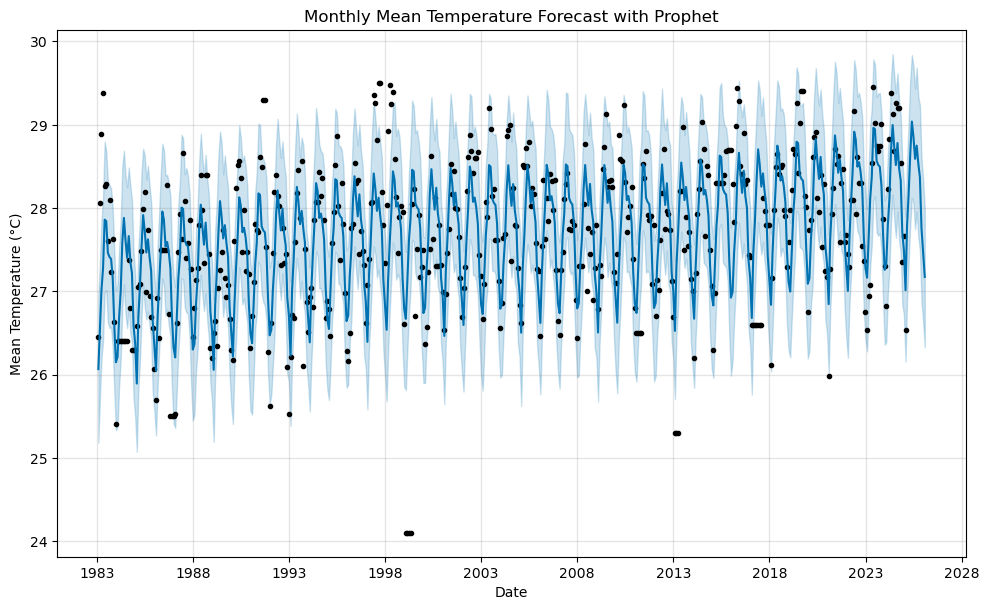

In [50]:
# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Monthly Mean Temperature Forecast with Prophet')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature (°C)')
plt.show()



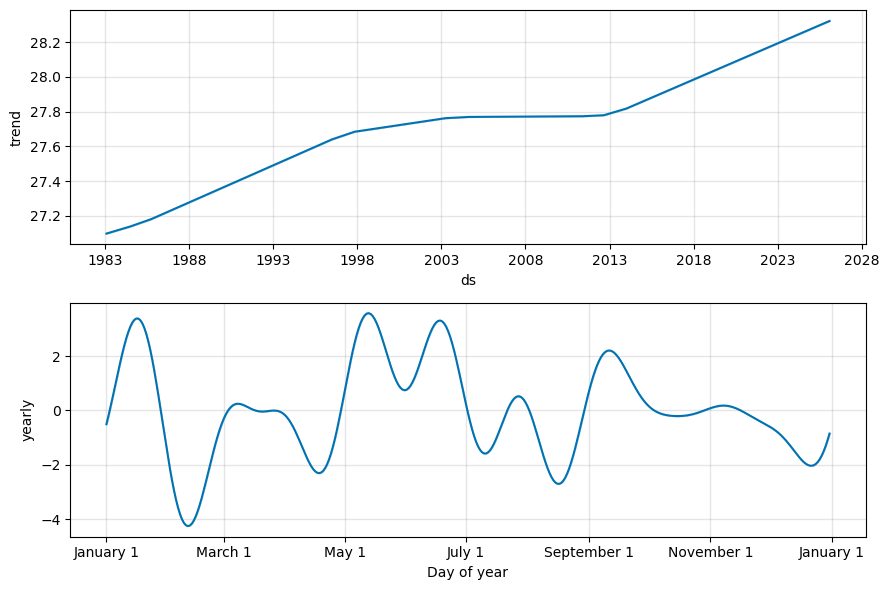

In [51]:
# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

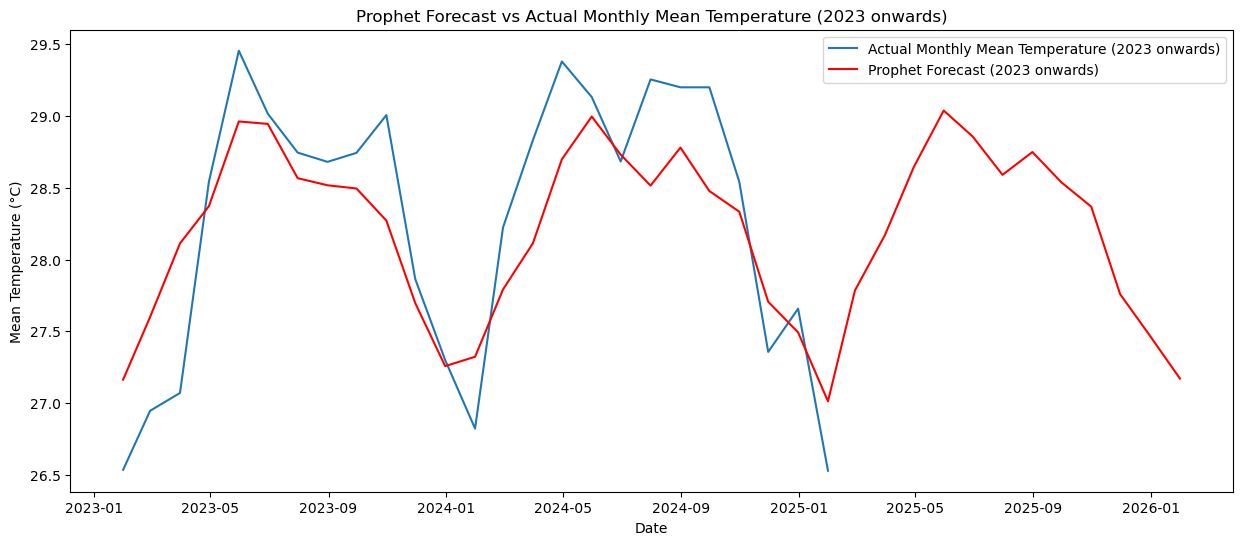

In [53]:
# Plot the Prophet forecast and actual data from 2023 onwards
plt.figure(figsize=(15, 6))
plt.plot(meanDfMonthly['Mean Temperature (°C)'].dropna()['2023':], label='Actual Monthly Mean Temperature (2023 onwards)')
plt.plot(forecast.set_index('ds')['yhat']['2023':], label='Prophet Forecast (2023 onwards)', color='red')
plt.title('Prophet Forecast vs Actual Monthly Mean Temperature (2023 onwards)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

In [55]:
forecast.set_index('ds')['2023':]

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2023-01-31,28.196730,26.278144,27.985297,28.196730,28.196730,-1.033462,-1.033462,-1.033462,-1.033462,-1.033462,-1.033462,0.0,0.0,0.0,27.163267
2023-02-28,28.199926,26.772710,28.461739,28.199926,28.199926,-0.599736,-0.599736,-0.599736,-0.599736,-0.599736,-0.599736,0.0,0.0,0.0,27.600190
2023-03-31,28.203465,27.301809,28.992761,28.203465,28.203465,-0.090838,-0.090838,-0.090838,-0.090838,-0.090838,-0.090838,0.0,0.0,0.0,28.112627
2023-04-30,28.206890,27.550084,29.192138,28.206890,28.206890,0.165271,0.165271,0.165271,0.165271,0.165271,0.165271,0.0,0.0,0.0,28.372161
2023-05-31,28.210429,28.083444,29.783899,28.210429,28.210429,0.751698,0.751698,0.751698,0.751698,0.751698,0.751698,0.0,0.0,0.0,28.962127
2023-06-30,28.213854,28.140173,29.722091,28.213854,28.213854,0.731286,0.731286,0.731286,0.731286,0.731286,0.731286,0.0,0.0,0.0,28.945140
2023-07-31,28.217393,27.706258,29.332701,28.217393,28.217393,0.349638,0.349638,0.349638,0.349638,0.349638,0.349638,0.0,0.0,0.0,28.567031
2023-08-31,28.220932,27.666919,29.374614,28.220932,28.220932,0.296477,0.296477,0.296477,0.296477,0.296477,0.296477,0.0,0.0,0.0,28.517409
2023-09-30,28.224357,27.699498,29.380553,28.224357,28.224357,0.270837,0.270837,0.270837,0.270837,0.270837,0.270837,0.0,0.0,0.0,28.495194


In [ ]:
cleanDf

In [ ]:
future